## **Imports**

In [ ]:
import numpy as np
import cv2
from google.colab.patches import cv2_imshow
from matplotlib import pyplot as plt

## **Load Image**

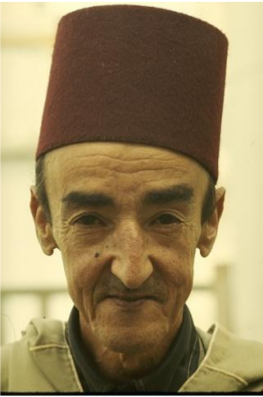

In [ ]:
img_link = '/content/original rgb.png'
img_bgr = cv2.imread(img_link)
cv2_imshow(img_bgr)
print('Orginal Image Shape: ')
print(img_bgr.shape)

## **Resize Image**

Orginal Image Shape: 
(397, 263, 3)


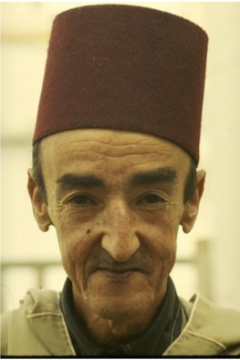

New Image Shape: 
(360, 240, 3)


In [ ]:
img_resized = cv2.resize(img_bgr,dsize=(240,360))
cv2_imshow(img_resized)
print('New Image Shape: ')
print(img_resized.shape)

# **1.1 Generating a black-and-white sketch**

## **Convert BGR IMAGE to Grayscale**
Laplacian filters use grayscale images, we must convert from OpenCV’s default BGR format to Grayscale.

Gray Scale Image


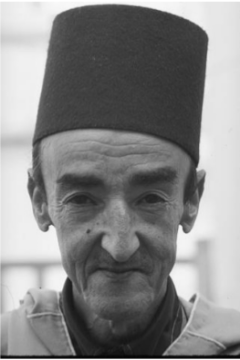

In [ ]:
img_grayscale = cv2.cvtColor(img_resized, cv2.COLOR_BGR2GRAY)
print('Gray Scale Image')
cv2_imshow(img_grayscale)

## **1.1.1 Noise Reduction Using Median Filter**
removing noise while keeping the edge sharp

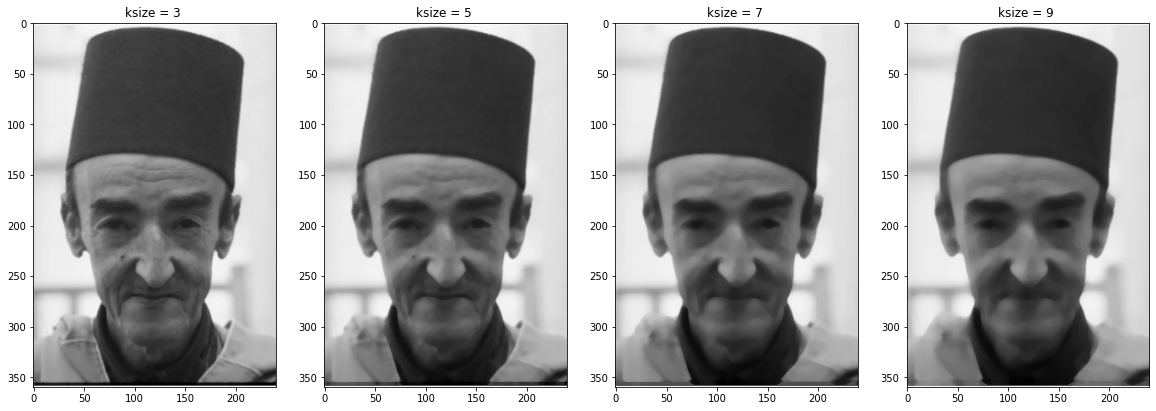

In [ ]:
# Test different kernal sizes
medianfilter_kernels = [3, 5, 7, 9]
fig,ax=plt.subplots(nrows=1,ncols=len(medianfilter_kernels),figsize=(20,8))
for i in range(len(medianfilter_kernels)):
  medianfilter_test = cv2.medianBlur(img_grayscale,ksize=medianfilter_kernels[i])
  ax[i].title.set_text(f"ksize = {medianfilter_kernels[i]} ")
  ax[i].imshow(medianfilter_test,cmap='gray')

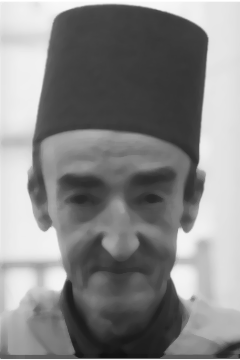

In [ ]:
# kernal Size = (7, 7) is chosen
smoothed_img = cv2.medianBlur(img_grayscale, 7)
cv2_imshow(smoothed_img)

## **1.1.2 Edge Detection Using Laplacian Filter**

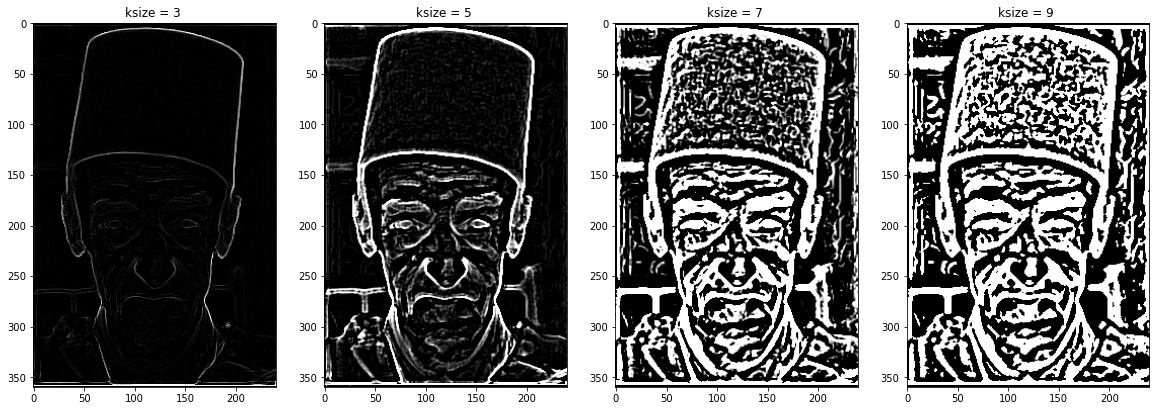

In [ ]:
# Test different kernal sizes
laplacian_kernels = [3, 5, 7, 9]
fig,ax=plt.subplots(nrows=1,ncols=len(laplacian_kernels),figsize=(20,8))
for i in range(len(laplacian_kernels)):
  laplacian_test = cv2.Laplacian(smoothed_img, -1, ksize=laplacian_kernels[i])
  ax[i].title.set_text(f"ksize = {laplacian_kernels[i]} ")
  ax[i].imshow(laplacian_test,cmap='gray')

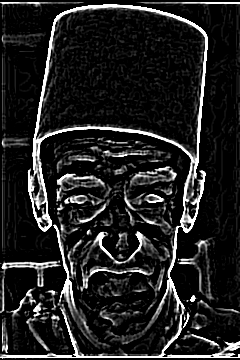

In [ ]:
# kernal Size = (5, 5) is chosen
img_edges = cv2.Laplacian(smoothed_img, -1, ksize=5)
cv2_imshow(img_edges)

## **Binary Thresholding**
The Laplacian filBinary Thresholdingter produces edges with varying brightness, so to make the edges look more like a sketch we apply a binary threshold to make the edges either white or black.


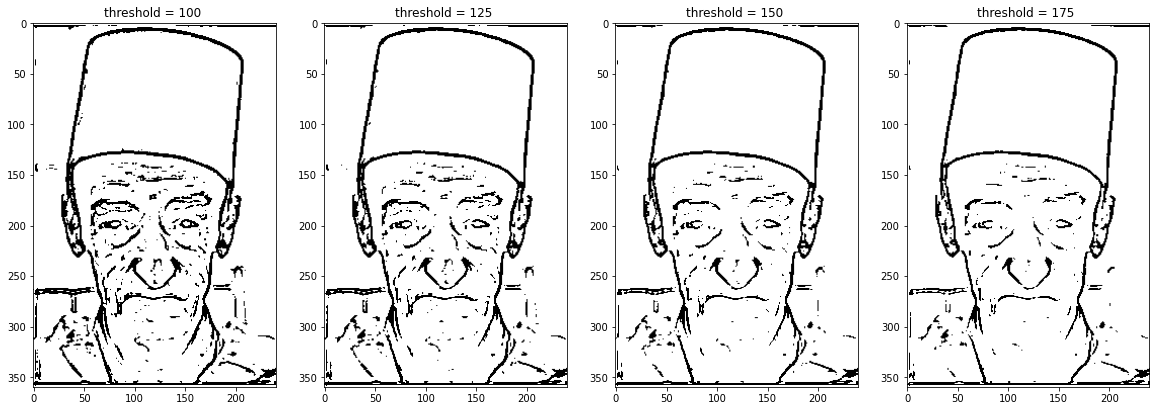

In [ ]:
# Test different thresholds
thr_max = 255
thr_min_test = [100, 125, 150, 175]
fig,ax=plt.subplots(nrows=1,ncols=len(thr_min_test),figsize=(20,8))
for i in range(len(thr_min_test)):
  _,mask_test = cv2.threshold(img_edges, thr_min_test[i], thr_max, cv2.THRESH_BINARY)
  ax[i].title.set_text(f"threshold = {thr_min_test[i]} ")
  ax[i].imshow(cv2.bitwise_not(mask_test),cmap='gray')

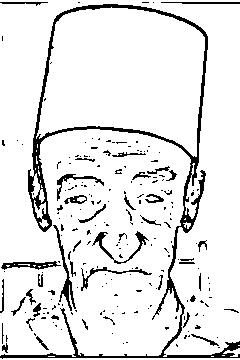

In [ ]:
# Threshold [125,255] is chosen
_, img_mask = cv2.threshold(img_edges, 125, 255, cv2.THRESH_BINARY)
img_mask = cv2.bitwise_not(img_mask)
cv2_imshow(img_mask)

# **1.2 Generating a color painting and a cartoon**

## **Bilateral Filter**
four parameters that control the bilateral filter: color strength, positional strength, size, and repetition count.


In [ ]:
REPETITIONS = 5
KERNAL_SIZE = 9

The most important trick we can use is to perform bilateral filtering at a lower resolution. It will have a similar effect as at full resolution.


In [ ]:
img_lowRes = cv2.resize(img_resized, (180, 270))

## Test Different Sigma Color

sigmaColor - Sigma of grey/color space.

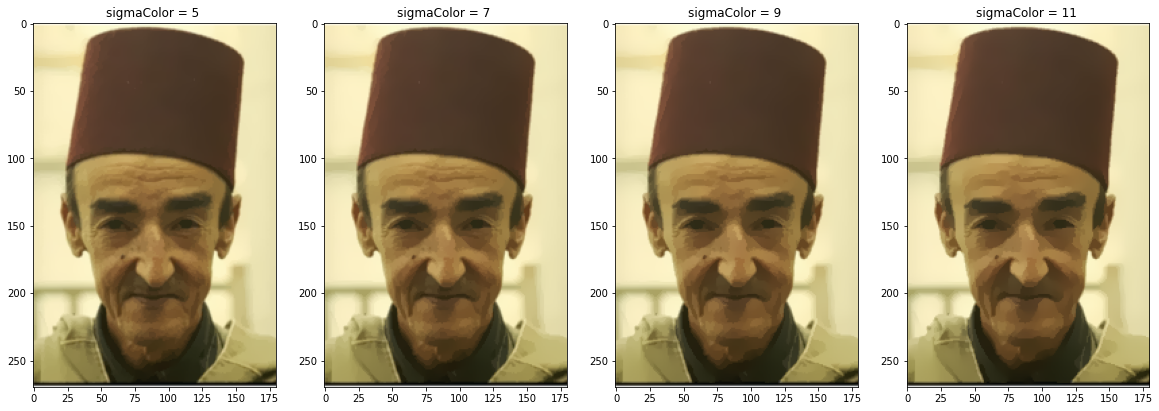

In [ ]:
SIGMA_SPACE = 9
sigmaColor_test = [5, 7, 9, 11]
fig,ax=plt.subplots(nrows=1,ncols=len(sigmaColor_test),figsize=(20,8))
for i in range(len(sigmaColor_test)):
  # Repeated Filter 
  test = cv2.bilateralFilter(img_lowRes, KERNAL_SIZE, sigmaColor_test[i], SIGMA_SPACE)
  for _ in range(REPETITIONS-1):
    test = cv2.bilateralFilter(test, KERNAL_SIZE, sigmaColor_test[i], SIGMA_SPACE)

  test = cv2.resize(test,dsize=(240,360))
  ax[i].imshow(cv2.cvtColor(test, cv2.COLOR_BGR2RGB))
  ax[i].title.set_text(f"sigmaColor = {sigmaColor_test[i]} ")

sigma color '7' is chosen

## Test Different Sigma Space

sigmaSpace - Large value means farther pixels influence each other (as long as the colors are close enough)

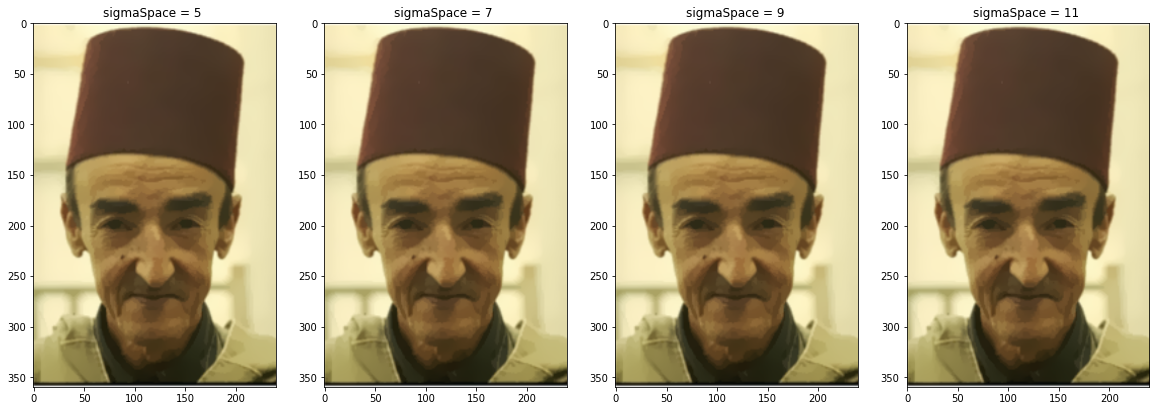

In [ ]:
SIGMA_COLOR = 7
sigmaSpace_test = [5, 7, 9, 11]
fig,ax=plt.subplots(nrows=1,ncols=len(sigmaSpace_test),figsize=(20,8))
for i in range(len(sigmaSpace_test)):
  # Repeated Filter 
  test = cv2.bilateralFilter(img_lowRes, KERNAL_SIZE, SIGMA_COLOR, sigmaSpace_test[i])
  for _ in range(REPETITIONS-1):
    test = cv2.bilateralFilter(test, KERNAL_SIZE, SIGMA_COLOR,sigmaSpace_test[i])

  test = cv2.resize(test,dsize=(240,360))
  ax[i].imshow(cv2.cvtColor(test, cv2.COLOR_BGR2RGB))
  ax[i].title.set_text(f"sigmaSpace = {sigmaSpace_test[i]} ")

sigma space '7' is chosen

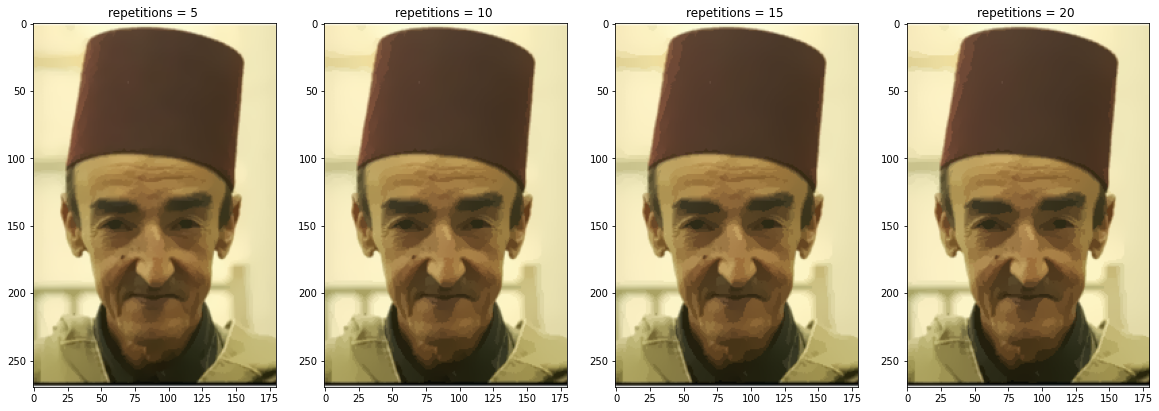

In [ ]:
SIGMA_COLOR = 7
repetitions_test = [5,10,15,20]
fig,ax=plt.subplots(nrows=1,ncols=len(repetitions_test),figsize=(20,8))
for i in range(len(repetitions_test)):
  # Repeated Filter 
  test = cv2.bilateralFilter(img_lowRes, KERNAL_SIZE, SIGMA_COLOR, SIGMA_SPACE)
  for _ in range(repetitions_test[i]-1):
    test = cv2.bilateralFilter(test, KERNAL_SIZE, SIGMA_COLOR,SIGMA_SPACE)

  test = cv2.resize(test,dsize=(240,360))
  ax[i].imshow(cv2.cvtColor(test, cv2.COLOR_BGR2RGB))
  ax[i].title.set_text(f"repetitions = {repetitions_test[i]} ")

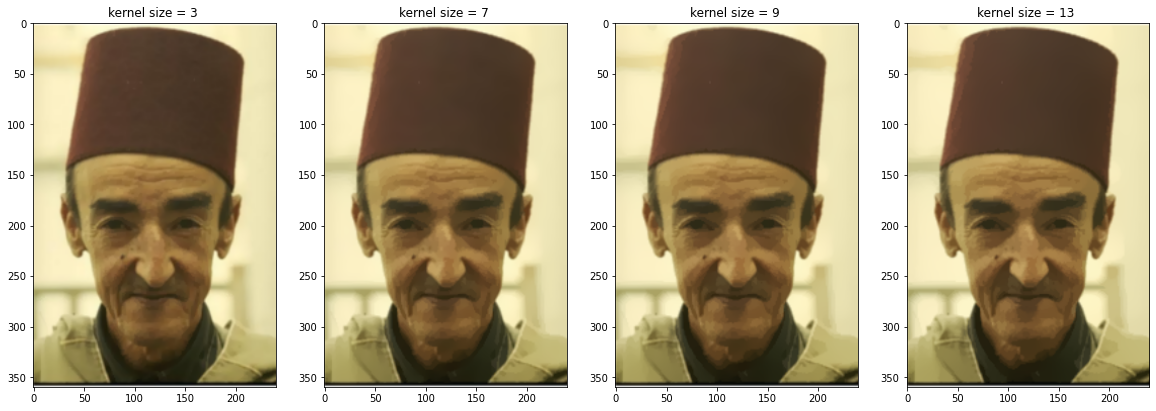

In [ ]:
kernel_test = [3,7,9,13]
fig,ax=plt.subplots(nrows=1,ncols=len(kernel_test),figsize=(20,8))
for i in range(len(kernel_test)):
  # Repeated Filter 
  test = cv2.bilateralFilter(img_lowRes, kernel_test[i], SIGMA_COLOR, SIGMA_SPACE)
  for _ in range(REPETITIONS-1):
    test = cv2.bilateralFilter(test, kernel_test[i], SIGMA_COLOR,SIGMA_SPACE)

  test = cv2.resize(test,dsize=(240,360))
  ax[i].imshow(cv2.cvtColor(test, cv2.COLOR_BGR2RGB))
  ax[i].title.set_text(f"kernel size = {kernel_test[i]} ")

## **Apply Bilateral filter**
KERNAL_SIZE = 9
SIGMA_COLOR = 7
SIGMA_SPACE = 7
REPETITIONS = 5


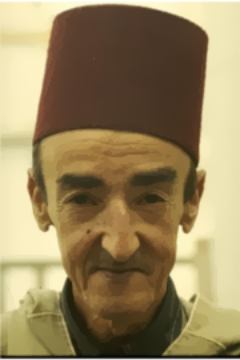

In [ ]:
SIGMA_COLOR = 7
SIGMA_SPACE = 7

img_bilateralFilter = cv2.bilateralFilter(img_lowRes, KERNAL_SIZE, SIGMA_COLOR, SIGMA_SPACE)
for _ in range(REPETITIONS-1):
  img_bilateralFilter = cv2.bilateralFilter(img_bilateralFilter, KERNAL_SIZE, SIGMA_COLOR, SIGMA_SPACE)

img_bilateralFilter = cv2.resize(img_bilateralFilter,dsize=(240,360))
cv2_imshow(img_bilateralFilter)

## **Overlay the edge mask**

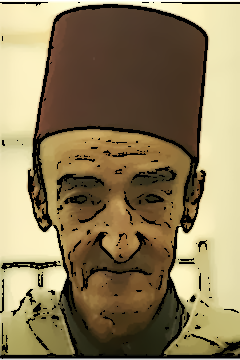

In [ ]:
black_img = np.zeros(img_resized.shape)
for i in range(3):
  black_img[:,:,i] = cv2.bitwise_and(img_bilateralFilter[:,:,i], img_mask)
cv2_imshow(black_img)

In [ ]:
SIGMA_COLOR = 7
SIGMA_SPACE = 7
REPETITIONS = 5
KERNAL_SIZE = 9
IMG_SHAPE = (240,360)

def cartoonify(imgPath, sigmaColor = SIGMA_COLOR, sigmaSpace = SIGMA_SPACE, repetitions = REPETITIONS, kernelSize = KERNAL_SIZE):
  img = cv2.imread(imgPath)
  resized_img = cv2.resize(img, dsize=IMG_SHAPE)
  img_grayscale = cv2.cvtColor(resized_img, cv2.COLOR_BGR2GRAY)
  smoothed_img = cv2.medianBlur(img_grayscale, 7)
  img_edges = cv2.Laplacian(smoothed_img, -1, ksize=5)
  _, img_mask = cv2.threshold(img_edges, 125, 255, cv2.THRESH_BINARY)
  img_mask = cv2.bitwise_not(img_mask)

  img_bilateralFilter = cv2.bilateralFilter(resized_img, kernelSize, sigmaColor, sigmaSpace)
  for _ in range(repetitions-1):
    img_bilateralFilter = cv2.bilateralFilter(img_bilateralFilter, kernelSize, sigmaColor, sigmaSpace)

  cartoonified_img = np.zeros(resized_img.shape,dtype=np.uint8)
  for i in range(3):
    cartoonified_img[:,:,i] = cv2.bitwise_and(img_bilateralFilter[:,:,i], img_mask)
  
  fig,ax=plt.subplots(nrows=1,ncols=2,figsize=(20,8))
  ax[0].imshow(cv2.cvtColor(resized_img, cv2.COLOR_BGR2RGB))
  ax[0].title.set_text("Original Image")
  ax[1].imshow(cv2.cvtColor(cartoonified_img, cv2.COLOR_BGR2RGB))
  ax[1].title.set_text("Cartoonified Image")

32


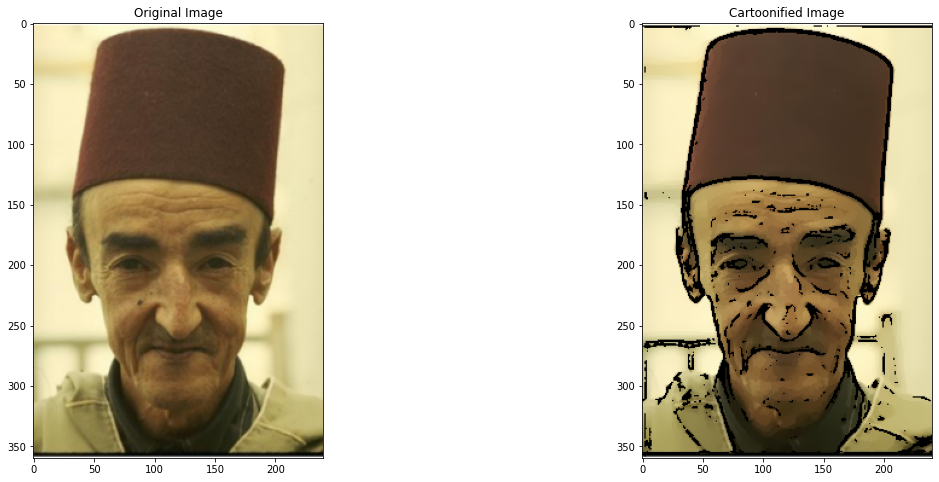

In [ ]:
cartoonify('/content/original rgb.png')

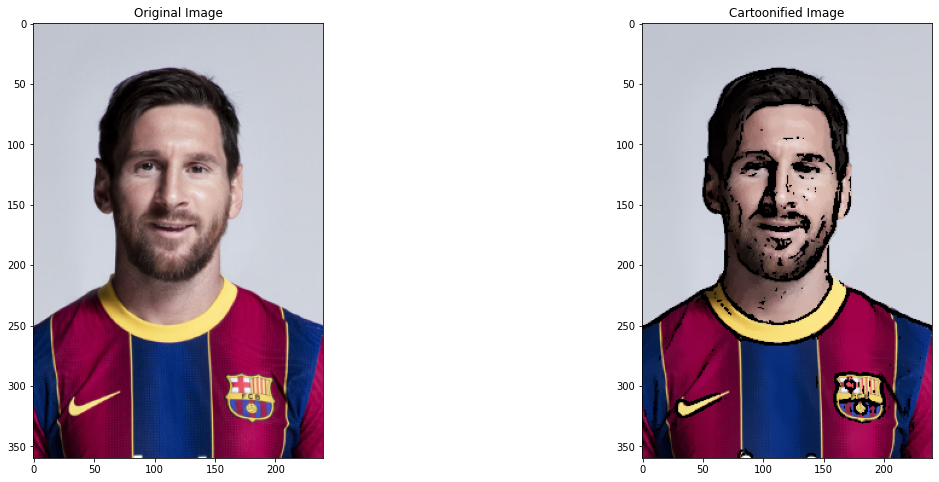

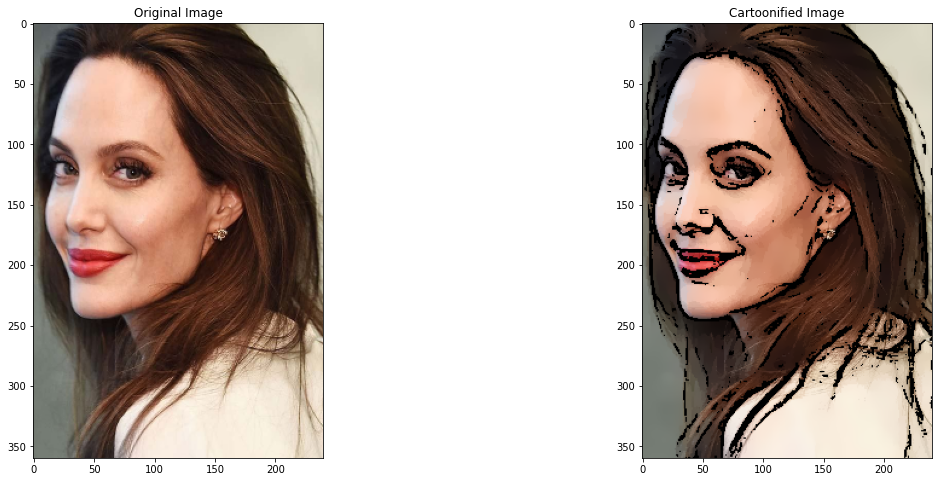

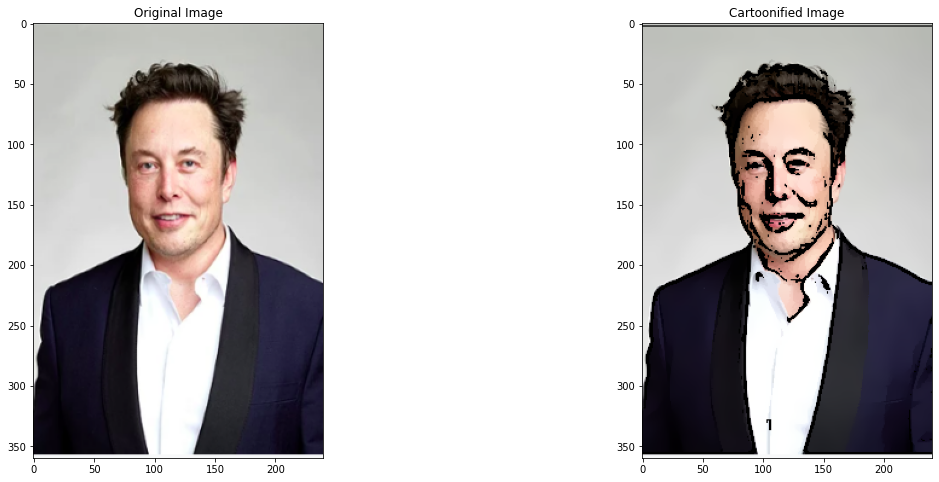

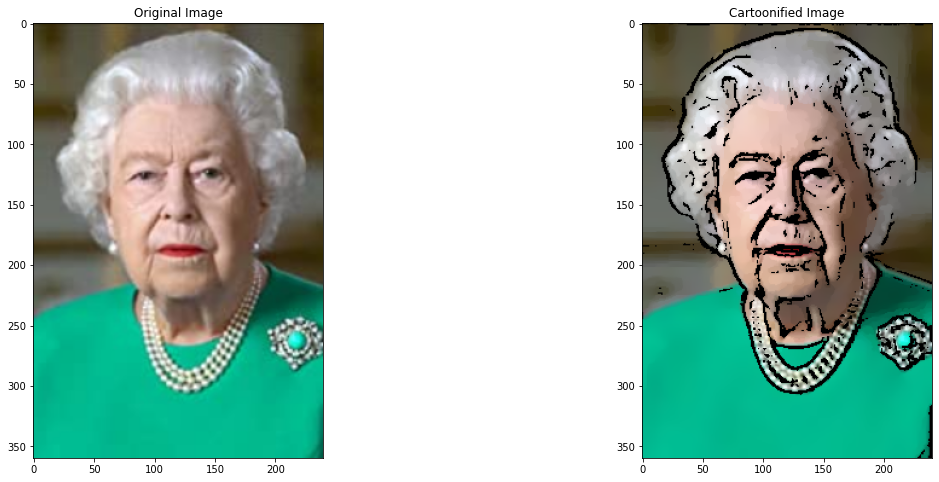

In [ ]:
cartoonify('/content/MESSI.jpg')
cartoonify('/content/e229e4a1b15b483a58494ebdcfb38eb0.jpg')
cartoonify('/content/Screenshot from 2022-10-28 17-25-54.png')
cartoonify('/content/MV5BOWU2ZThlOWUtY2JjYS00MjY4LWE3YzctOTQ0M2Y2OGRjZTYzXkEyXkFqcGdeQXVyNjUxMjc1OTM@._V1_UY256_CR34,0,172,256_AL_.jpg')